In [191]:
%matplotlib inline

import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import gdal

import cartopy
import imageio

In [192]:
path_base = '/g/data/rr5/satellite/obs/himawari8/FLDK/'

#bands = np.array(['01','02','03','08','13','15'])

band_suffix = np.array(['-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B08-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B13-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B15-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'])


In [194]:
s_time = datetime(2020,1,20,12,0,0) -timedelta(hours=10)
e_time = datetime(2020,1,20,12,0,0) -timedelta(hours=10)
space_minutes = 60


dif_minutes= (e_time - s_time)
dif_minutes= dif_minutes.seconds/60

t_range = np.arange(dif_minutes/space_minutes + 1)
print(t_range)
dates = np.array([s_time + timedelta(minutes=space_minutes*i) for i in t_range])
dates

[0.]


array([datetime.datetime(2020, 1, 20, 2, 0)], dtype=object)

In [195]:
# Set clip coords
lat0 = -9.975
lat1 = -44.025
lon0 = 111.975
lon1 = 154.025
res = 0.02

wgs84_wkt = 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

arr_stack.shape

(1702, 2102, 6)

In [196]:
#Use clip coords to make extent and lat and long arrays for gdal
x_size = int((lon1 - lon0)/res)
y_size = int((lat1 - lat0)/(-1*res))


lats = np.linspace(lat0, lat1+res, num=y_size)
lons = np.linspace(lon0, lon1-res, num=x_size)


geot = [lon0, res, 0., lat0, 0., -1*res]

In [197]:
#Create array of paths
paths = ["" for x in range(len(dates))]

for jj in range(len(dates)):
    ii = dates[jj]
    paths[jj] = path_base + str(ii.year) +'/'+'%02i'%(ii.month) +'/'+ '%02i'%(ii.day) +'/'+ '%02i'%ii.hour +'%02i'%ii.minute+'/'+str(ii.year)+ '%02i'%(ii.month)+ '%02i'%(ii.day)+'%02i'%ii.hour +'%02i'%ii.minute+'00'
    #print(paths[jj])
    

(1702, 2102, 6)

In [198]:


for ii in paths:
    
    
    
    for jj in range(len(band_suffix)):
        src = gdal.Open(ii + band_suffix[jj])
    
        dst = gdal.GetDriverByName('MEM').Create('', x_size, y_size, 1, gdal.GDT_Float32,)
        dst.GetRasterBand(1).WriteArray(np.zeros((y_size, x_size), dtype=np.float32))
        dst.SetGeoTransform(geot)
        dst.SetProjection(wgs84_wkt)
        dst.ReadAsArray().dtype
    
        err = gdal.ReprojectImage(src,dst,None,None,gdal.GRA_NearestNeighbour)

        arr = dst.ReadAsArray()
        
        if jj==0:
            arr_stack = arr.copy()
            arr_stack = np.expand_dims(arr_stack,axis=2)
       
        else:
            arr = np.expand_dims(arr,axis=2)
            arr_stack = np.append(arr_stack,arr,axis=2)
            
        
           
        
        


1.2060547


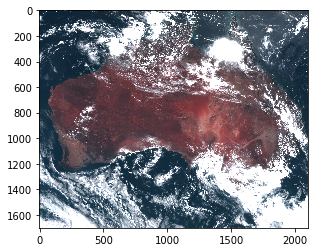

In [203]:
#PLOT RGB (for last timestep)
arr_stack.shape
rgb = arr_stack[:,:,[2,1,0]]
rgb.shape
print(rgb.max())
rgb = np.clip(rgb,0,0.5)
rgb = rgb/rgb.max()
rgb = rgb*255

plt.imshow(rgb.astype('uint8'))

In [100]:
## IGNORE BELOW HERE
!ls /g/data/rr5/satellite/obs/himawari8/FLDK/2019/01/01/0000

20190101000000-P1S-ABOM_BRF_B01-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B02-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B03-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B03-PRJ_GEOS141_500-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B04-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B04-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_BRF_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_GEOM_SOLAR-PRJ_GEOS141_1000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_GEOM_SOLAR-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_GEOM_SOLAR-PRJ_GEOS141_500-HIMAWARI8-AHI.nc
20190101000000-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
201

(-5500000.0, 2000.0, 0.0, 5500000.0, 0.0, -2000.0)
PROJCS["unnamed",GEOGCS["unknown",DATUM["unnamed",SPHEROID["Spheroid",6378137,298.257024882273]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Geostationary_Satellite"],PARAMETER["central_meridian",140.7],PARAMETER["satellite_height",35785863],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


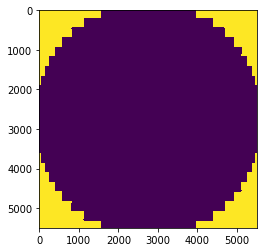

In [16]:
# Below here loads a single netcdf

path = '/g/data/rr5/satellite/obs/himawari8/FLDK/'

src = gdal.Open('/g/data/rr5/satellite/obs/himawari8/FLDK/2019/01/01/0000/20190101000000-P1S-ABOM_OBS_B11-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc')



print(src.GetGeoTransform())
print(src.GetProjection())

arr = src.ReadAsArray()

arr.shape, arr.dtype
plt.imshow(arr)

In [17]:
x_size = int((lon1 - lon0)/res)
y_size = int((lat1 - lat0)/(-1*res))


lats = np.linspace(lat0, lat1+res, num=y_size)
lons = np.linspace(lon0, lon1-res, num=x_size)


geot = [lon0, res, 0., lat0, 0., -1*res]

dst = gdal.GetDriverByName('MEM').Create('', x_size, y_size, 1, gdal.GDT_Float32,)
dst.GetRasterBand(1).WriteArray(np.zeros((y_size, x_size), dtype=np.float32))
dst.SetGeoTransform(geot)
dst.SetProjection(wgs84_wkt)
dst.ReadAsArray().dtype

dtype('float32')

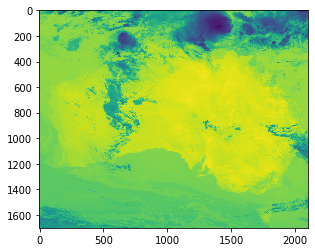

In [18]:
err = gdal.ReprojectImage(src,dst,None,None,gdal.GRA_NearestNeighbour)

arr = dst.ReadAsArray()
plt.imshow(arr)